# Riley, Alexander - Homework 1

## Question 1: Inverse Method for exponentials

* Use the inverse method and the language $Unif[0,1]$ generator (runif in R, numpy.random.uniform in python), to generate random deviates from an exponential distribution with mean $\mu$. $\mu$ and the number of random deviates should be arguments to your function. This is Example 22.3.1 in Lange. Be aware that there are two standard methods for parameterizing the exponential.

To draw $X$ from the density

$$ f(x) = \frac{1}{\mu} e^{-\frac{1}{\mu}} $$

for $x>0$ and $f(x)=0$ otherwise, the inverse method shows that if $U \sim Unif[0,1]$ then $X = -\mu \ln(1-U) = -\mu \ln(U)$

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
np.random.seed(1234)

# Question 1.1
def random_exp_inverse(mu=0.5, size=1000):
    U = np.random.uniform(size=size)
    X = -mu*np.log(U)
    return X

* For some particular $\mu$ of your choosing, make a histogram of the random deviates and plot the appropriate exponential density curve on top of the histogram to confirm that the generator is working. Verify that the mean and standard deviation are what they should be.

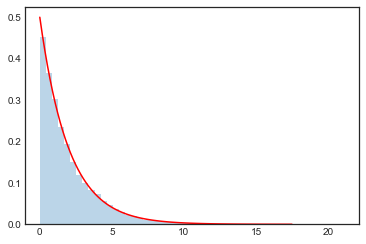

Mean: 2.006428458275679
Stdv: 2.009137764277492


In [2]:
# Question 1.2
mu = 2.0
n = 10000
Y = random_exp_inverse(mu=mu, size=n)

x = np.linspace(0,17.5,100)
y = (1/mu)*np.exp(-(x/mu))

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=50)
plt.hist(Y, **kwargs)
plt.plot(x,y,'r-')
plt.show()

# note: for exponential distr mu = mean = std. dev.
print("Mean: " + str(np.mean(Y)))
print("Stdv: " + str(np.std(Y, ddof=1)))

* Compare the speed of your exponential generator to the language generator (rexp in R, numpy.random.exponential in python). Try to make your generator computationally competitive with the built in generator, by avoiding for loops and other slow code.

In [3]:
# Question 1.3
%timeit np.random.exponential(scale=mu, size=n)

382 µs ± 22.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
%timeit random_exp_inverse(mu=mu, size=n)

371 µs ± 25.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Question 2: Simulation Study of the LLN and CLT

* Create a $n \times p$ matrix $X$ with $n=100$ and $p=1000$ and each entry $1$ with probability $0.5$ and $0$ with probability $0.5$. If you would like some intuition for this simulation consider this: Suppose 1/2 of all voters support proposition A. We conduct 100 surveys (number of rows of X) each with 1000 voters (number of columns = sample size of poll). A voter responds 1 if they support A, 0 if they do not support A. Note on Confusing Notation: The sample size of each poll is $p$. Usually $n$ is sample size.

In [5]:
# Question 2.1
n = 100
p = 1000

U = np.random.uniform(size=n*p)
X = np.reshape(U < 0.5, (n,p))
X = X.astype(int).astype(float)
X

array([[1., 1., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 1., 0., ..., 0., 1., 1.]])

* Compute the running mean of each row of $X$ to produce a new matrix $Y$ which is again $100 \times 1000$. Specifically the row $i$, column $j$ entry of $Y$ is
$$Y_{ij} = \frac{1}{j} \sum_{k=1}^j X_{ik}$$
Try to avoid using nested for loops.

In [6]:
# Question 2.2
Y = np.cumsum(X,axis=1)
colnum = np.linspace(1,1000,1000)
colmatrix = np.tile(colnum, (n,1))
Y = Y / colmatrix
Y

array([[1.        , 1.        , 0.66666667, ..., 0.50701403, 0.50750751,
        0.507     ],
       [1.        , 1.        , 1.        , ..., 0.50701403, 0.50750751,
        0.508     ],
       [1.        , 0.5       , 0.33333333, ..., 0.48096192, 0.48048048,
        0.48      ],
       ...,
       [0.        , 0.        , 0.33333333, ..., 0.48897796, 0.48948949,
        0.489     ],
       [0.        , 0.5       , 0.33333333, ..., 0.48997996, 0.49049049,
        0.49      ],
       [1.        , 1.        , 0.66666667, ..., 0.47895792, 0.47947948,
        0.48      ]])

* Plot each row of $Y$ (on the y--axis) against the column number (on the x--axis). This will result in 1 plot with 100 lines. Then make three histograms 1) first column of $Y$, 2) 10th column of $Y$, and 3) the last column of $Y$. Your images should roughly look like what is below. (If you want to make the results clearer and prettier, draw all histograms or density estimators on top of each other with different colors, see lecture notes from the first class [here](https://longjp.github.io/statcomp/lectures/00intro.ipynb) for how to do this with ggplot in R or [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html) for code in python from VanderPlas) What is this simulation showing?

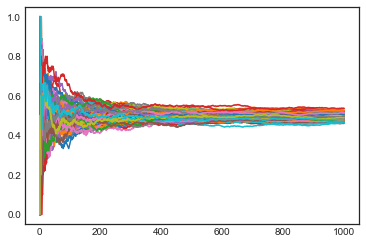

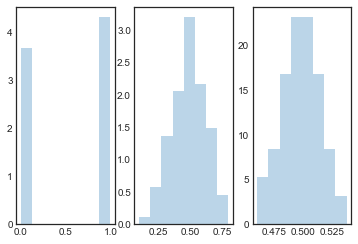

In [7]:
# Question 2.3
for row in Y:
    plt.plot(colnum, row, '-')
plt.show()

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=8)
plt.subplot(1,3,1)
plt.hist(Y[:,0], **kwargs)

plt.subplot(1,3,2)
plt.hist(Y[:,9], **kwargs)

plt.subplot(1,3,3)
plt.hist(Y[:,-1], **kwargs)
plt.show()

The simulation is showing convergence to the expected value of 0.5 as you travel across rows (law of large numbers) and that adding independent random variables tends toward a normal distribution (central limit theorem).